In [1]:
# # !pip install statsmodels
# ! pip install openpyxl 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
import statsmodels.api as  sns 
from sklearn.linear_model import LinearRegression


In [3]:
df=  pd.read_excel("Date-Wise-Prices-all-Commodity.xlsx")
df.head()

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Table1,0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 1,FAQ,24/02/2023,4000,4100.0,4000.0
1,Table2,1,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,24/02/2023,3000,3500.0,3500.0
2,Table3,2,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 3,FAQ,24/02/2023,2300,2300.0,2300.0
3,Table4,3,Andhra Pradesh,Chittor,Punganur,Tomato,Hybrid,FAQ,24/02/2023,1340,2000.0,1670.0
4,Table5,4,Andhra Pradesh,Chittor,Vayalapadu,Tomato,Local,FAQ,24/02/2023,640,2160.0,1400.0


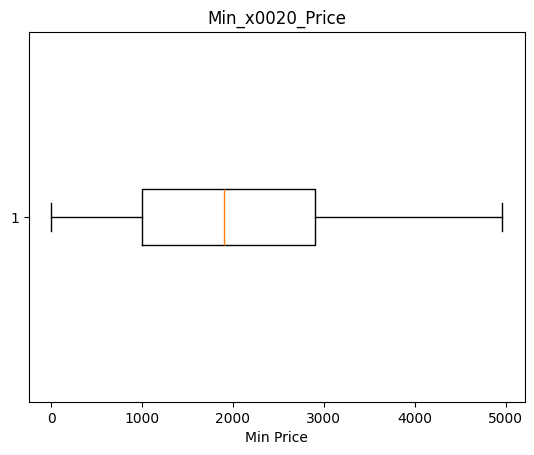

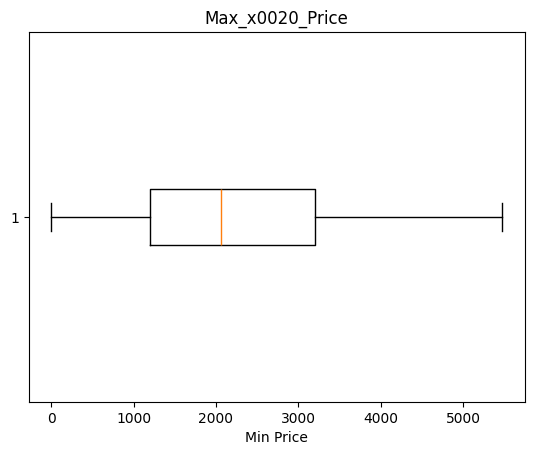

In [4]:
for i in ['Min_x0020_Price','Max_x0020_Price']:

    threshold = df[i].quantile(0.79)

    # Filter the data
    filtered_data = df[df[i] < threshold][i]
    fig, ax = plt.subplots()
    ax.boxplot(filtered_data, vert=False)
    ax.set_title(i)
    ax.set_xlabel('Min Price')
    plt.show()

In [5]:
for i in df.columns:
    print(i)

diffgr:id
msdata:rowOrder
State
District
Market
Commodity
Variety
Grade
Arrival_Date
Min_x0020_Price
Max_x0020_Price
Modal_x0020_Price


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diffgr:id          6435 non-null   object 
 1   msdata:rowOrder    6435 non-null   int64  
 2   State              6435 non-null   object 
 3   District           6435 non-null   object 
 4   Market             6435 non-null   object 
 5   Commodity          6435 non-null   object 
 6   Variety            6435 non-null   object 
 7   Grade              6435 non-null   object 
 8   Arrival_Date       6435 non-null   object 
 9   Min_x0020_Price    6435 non-null   int64  
 10  Max_x0020_Price    6435 non-null   float64
 11  Modal_x0020_Price  6435 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 603.4+ KB


In [7]:
df.isnull().sum()

diffgr:id            0
msdata:rowOrder      0
State                0
District             0
Market               0
Commodity            0
Variety              0
Grade                0
Arrival_Date         0
Min_x0020_Price      0
Max_x0020_Price      0
Modal_x0020_Price    0
dtype: int64

In [8]:
x=df.iloc[:,[4,5,6,7,9,10]].values
y=df.iloc[:,-1].values


In [9]:
cat = [c for c in df.columns if type(df[c][1]).__name__ == "str"  and c != "Arrival_Date"]
for i in cat:
    print(df[i].unique()[0])

Table1
Andhra Pradesh
Chittor
Chittoor
Gur(Jaggery)
NO 1
FAQ


In [10]:
ln = LabelEncoder()

In [11]:

for i in cat:
    df[i] = ln.fit_transform(df[i])

In [12]:
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'])
df.head()

/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_10068/923898063.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'])


,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,0,0,0,50,124,85,222,0,2023-02-24,4000,4100.0,4000.0
1,1111,1,0,50,124,85,223,0,2023-02-24,3000,3500.0,3500.0
2,2222,2,0,50,124,85,224,0,2023-02-24,2300,2300.0,2300.0
3,3333,3,0,50,453,166,155,0,2023-02-24,1340,2000.0,1670.0
4,4444,4,0,50,570,166,192,0,2023-02-24,640,2160.0,1400.0


In [13]:
df_cor = df.corr()
df_cor

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
diffgr:id,1.000000,0.536427,0.455479,0.035917,0.018072,0.124802,-0.094891,0.080773,NaN,-0.080050,-0.081905,-0.082154
msdata:rowOrder,0.536427,1.000000,0.953202,-0.057360,-0.035466,0.089472,-0.155221,-0.012831,NaN,-0.052610,-0.059041,-0.056654
State,0.455479,0.953202,1.000000,-0.215786,-0.136969,0.082799,-0.168227,-0.009551,NaN,-0.058012,-0.064089,-0.061864
District,0.035917,-0.057360,-0.215786,1.000000,0.464565,-0.011076,0.040984,0.004834,NaN,0.048504,0.049864,0.049372
Market,0.018072,-0.035466,-0.136969,0.464565,1.000000,-0.009174,0.024392,0.024859,NaN,0.026602,0.027773,0.027199
Commodity,0.124802,0.089472,0.082799,-0.011076,-0.009174,1.000000,0.394052,-0.086877,NaN,-0.057800,-0.055536,-0.056932
Variety,-0.094891,-0.155221,-0.168227,0.040984,0.024392,0.394052,1.000000,0.059050,NaN,0.011300,0.011928,0.012004
Grade,0.080773,-0.012831,-0.009551,0.004834,0.024859,-0.086877,0.059050,1.000000,NaN,0.092676,0.093384,0.092692
Arrival_Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Min_x0020_Price,-0.080050,-0.052610,-0.058012,0.048504,0.026602,-0.057800,0.011300,0.092676,NaN,1.000000,0.997647,0.999323


In [14]:


threshold = 0.7

row_remove = []
for col in df_cor.columns:
    for row in df_cor.index:
        if col != row and abs(df_cor.loc[row, col]) > threshold:
            print(f"{row} and {col}  {df_cor.loc[row, col]:.3f}")
            
            if row not in row_remove:

                row_remove.append(col)



State and msdata:rowOrder  0.953
msdata:rowOrder and State  0.953
Max_x0020_Price and Min_x0020_Price  0.998
Modal_x0020_Price and Min_x0020_Price  0.999
Min_x0020_Price and Max_x0020_Price  0.998
Modal_x0020_Price and Max_x0020_Price  0.999
Min_x0020_Price and Modal_x0020_Price  0.999
Max_x0020_Price and Modal_x0020_Price  0.999


In [15]:
row_remove

['msdata:rowOrder', 'Min_x0020_Price', 'Min_x0020_Price', 'Max_x0020_Price']

In [16]:
scaler = StandardScaler()

In [17]:
df_c = df.drop(["Arrival_Date","Max_x0020_Price","Min_x0020_Price"], axis=1)
X = df_c.iloc[:,2:10]
y=df_c.iloc[:,-1]

X  = scaler.fit_transform(X)
x_t,x_tes,y_t,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
x_t.shape

(5148, 7)

In [19]:
x_tes.shape

(1287, 7)

In [20]:
xx = sns.add_constant(x_t)
res = sns.OLS(y_t,xx).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Modal_x0020_Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.427e+32
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:01:44   Log-Likelihood:             1.1981e+05
No. Observations:                5148   AIC:                        -2.396e+05
Df Residuals:                    5140   BIC:                        -2.396e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4415.9797   2.64e-13   1.68e+16      0.000    4415.980    4415.980
x1          7.105e-13   2.77e-13      2.563      0.010    1.67e-13    1.25e-12
x2         -4.178e-12   3.03e-13    -13.783      0.000   -4.77e-12   -3.58e-12
x3          7.461e-13   2.97e-13      2.512      0.012    1.64e-13    1.33e-12
x4          3.951e-12   2.94e-13     13.451      0.000    3.37e-12    4.53e-12
x5          6.011e-12   2.94e-13     20.459      0.000    5.44e-12    6.59e-12
x6         -6.942e-12   2.64e-13    -26.280      0.000   -7.46e-12   -6.42e-12
x7          2.216e+04   2.91e-13   7.63e+16      0.000    2.22e+04    2.22e+04
==============================================================================
Omnibus:                    10589.893   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         62423413.416
Skew:                         -16.914   Prob(JB):                         0.00
Kurtosis:                     541.399   Cond. No.                         1.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
xh = sns.add_constant(x_tes)
res = sns.OLS(y_test,xh).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Modal_x0020_Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.027e+32
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:01:44   Log-Likelihood:                 29488.
No. Observations:                1287   AIC:                        -5.896e+04
Df Residuals:                    1279   BIC:                        -5.892e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4415.9797    7.6e-13   5.81e+15      0.000    4415.980    4415.980
x1          5.088e-12   8.07e-13      6.301      0.000     3.5e-12    6.67e-12
x2         -1.243e-11   8.65e-13    -14.372      0.000   -1.41e-11   -1.07e-11
x3          1.332e-12   8.69e-13      1.533      0.126   -3.73e-13    3.04e-12
x4         -4.458e-12    8.4e-13     -5.307      0.000   -6.11e-12   -2.81e-12
x5          9.173e-13   8.72e-13      1.052      0.293   -7.93e-13    2.63e-12
x6          1.483e-11   8.07e-13     18.372      0.000    1.32e-11    1.64e-11
x7          2.216e+04   5.95e-13   3.72e+16      0.000    2.22e+04    2.22e+04
==============================================================================
Omnibus:                     1545.807   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           394110.754
Skew:                          -5.794   Prob(JB):                         0.00
Kurtosis:                      87.942   Cond. No.                         1.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
lr =  LinearRegression()
lr

LinearRegression()

In [23]:
lr.fit(x_t,y_t)

LinearRegression()

In [24]:
pp = lr.coef_
pp

array([-1.07487780e-12,  1.81898940e-12, -1.59161573e-12, -4.32009983e-12,
       -5.68434189e-12,  1.30881972e-11,  2.21578302e+04])

In [25]:
lr.score(x_t,y_t)

1.0

In [32]:
lr.intercept_

np.float64(4415.979704739703)

In [28]:
for i in pp:
    print(round(i,6))

-0.0
0.0
-0.0
-0.0
-0.0
0.0
22157.830194


In [33]:
lk = lr.predict(x_tes)
lk

array([2300., 5000., 2400., ..., 3000., 2350., 4100.])

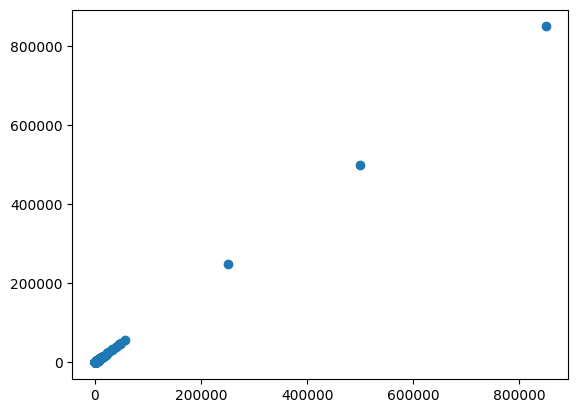

In [37]:
plt.scatter(y_test,lk);

In [38]:
!pip install seaborn 

You should consider upgrading via the '/Users/phulusoravhuhali/Documents/phuluso_all/phuluso_data_science/Data_science/mine/venv/bin/python -m pip install --upgrade pip' command.


In [39]:
import seaborn as sns 

<Axes: xlabel='Modal_x0020_Price', ylabel='Count'>

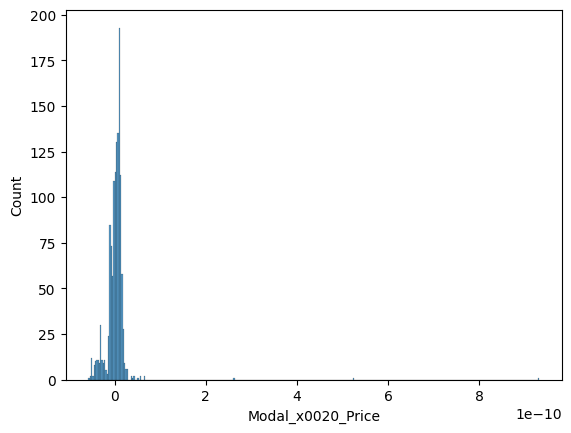

In [40]:
sns.histplot(y_test-lk)